# Упражнение 1

* Скачайте с портала Открытых Данных производственный календарь России: https://data.gov.ru/opendata/7708660670-proizvcalendar
* На его основе определите соответствующий календарь в Pandas: `RussianBusinessCalendar(AbstractHolidayCalendar)`
* С помощью полученного в пункте выше календаря и модуля `pd.offsets` создайте DataFrame one-hot календарных признаков:
    * День недели
    * Месяц
    * Выходной день
    * Праздничный день
    * Предпраздничный рабочий день
    * Последний день месяца
    * Последний рабочий день месяца
    * Предновогодний выходной день

## Задание

In [ ]:
# пример требуемого DataFrame 
events

,выходной,праздник,предпраздничный рабочий день,последний день месяца,последний рабочий день месяца,пн,вт,ср,чт,пт,сб,вс,январь,февраль,март,апрель,май,июнь,июль,август,сентябрь,октябрь,ноябрь,декабрь,Предновогодний выходной день
2014-01-01,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2014-01-02,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2014-01-03,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2014-01-04,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2014-01-05,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0


## Грузим календарь из csv

In [ ]:
import pandas as df
import datetime 

In [ ]:
calendar = pd.read_csv('calendar.csv')#  https://data.gov.ru/opendata/7708660670-proizvcalendar
calendar.head()

,Год/Месяц,Январь,Февраль,Март,Апрель,Май,Июнь,Июль,Август,Сентябрь,Октябрь,Ноябрь,Декабрь,Всего рабочих дней,Всего праздничных и выходных дней,Количество рабочих часов при 40-часовой рабочей неделе,Количество рабочих часов при 36-часовой рабочей неделе,Количество рабочих часов при 24-часовой рабочей неделе
0,1999,"1,2,3,4,6*,7,9,10,16,17,23,24,30,31","6,7,13,14,20,21,27,28","6,7,8,13,14,20,21,27,28","3,4,10,11,17,18,24,25,30*","1,2,3,4,8,9,10,15,16,22,23,29,30","5,6,11*,12,13,14,19,20,26,27","3,4,10,11,17,18,24,25,31","1,7,8,14,15,21,22,28,29","4,5,11,12,18,19,25,26","2,3,9,10,16,17,23,24,30,31","6,7,8,13,14,20,21,27,28","4,5,11,12,13,18,19,25,26,31*",251,114,2004,1807.2,1204.8
1,2000,"1,2,3,4,6*,7,8,9,15,16,22,23,29,30","5,6,12,13,19,20,26,27","4,5,7*,8,11,12,18,19,25,26","1,2,8,9,15,16,22,23,29,30","1,2,6,7,8*,9,13,14,20,21,27,28","3,4,10,11,12,17,18,24,25","1,2,8,9,15,16,22,23,29,30","5,6,12,13,19,20,26,27","2,3,9,10,16,17,23,24,30","1,7,8,14,15,21,22,28,29","4,5,7,11,12,18,19,25,26","2,3,9,10,11*,12,16,17,23,24,30,31",250,116,1995,1800.0,1200.0
2,2001,"1,2,6,7,8,13,14,20,21,27,28","3,4,10,11,17,18,24,25","3,4,7*,8,10,11,17,18,24,25,31","1,7,8,14,15,21,22,28,29,30*","1,2,5,6,8*,9,12,13,19,20,26,27","2,3,9,10,11*,12,16,17,23,24,30","1,7,8,14,15,21,22,28,29","4,5,11,12,18,19,25,26","1,2,8,9,15,16,22,23,29,30","6,7,13,14,20,21,27,28","3,4,6*,7,10,11,17,18,24,25","1,2,8,9,12,15,16,22,23,29,30",251,114,2001,1807.2,1204.8
3,2002,"1,2,5,6,7,12,13,19,20,26,27","2,3,9,10,16,17,22*,23,24,25","2,3,7*,8,9,10,16,17,23,24,30,31","6,7,13,14,20,21,28,30*","1,2,3,4,5,8*,9,10,11,12,19,25,26","1,2,8,9,11*,12,15,16,22,23,29,30","6,7,13,14,20,21,27,28","3,4,10,11,17,18,24,25,31","1,7,8,14,15,21,22,28,29","5,6,12,13,19,20,26,27","2,3,6*,7,8,9,16,17,23,24,30","1,7,8,11*,12,13,14,21,22,28,29,31*",250,115,1992,1792.0,1192.0
4,2003,"1,2,3,5*,6,7,11,12,18,19,25,26","1,2,8,9,15,16,22,23,24","1,2,7*,8,9,10,15,16,22,23,29,30","5,6,12,13,19,20,26,27,30*","1,2,3,4,8*,9,10,11,17,18,24,25,31","1,7,8,11*,12,13,14,15,22,28,29","5,6,12,13,19,20,26,27","2,3,9,10,16,17,23,24,30,31","6,7,13,14,20,21,27,28","4,5,11,12,18,19,25,26","1,2,6*,7,8,9,15,16,22,23,29,30","6,7,11*,12,13,14,20,21,27,28,31*",250,115,1992,1792.0,1192.0


In [ ]:
# название месяцев на русском
rus_month_names = {'Январь':1,
                   'Февраль':2,
                   'Март':3,
                   'Апрель':4,
                   'Май':5,
                   'Июнь':6,
                   'Июль':7,
                   'Август':8,
                   'Сентябрь':9,
                   'Октябрь':10,
                   'Ноябрь':11,
                   'Декабрь':12}

In [ ]:
rus_month_names.keys()

dict_keys(['Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь', 'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь'])

In [ ]:
# диапазон лет
min_year = calendar['Год/Месяц'].min()
max_year = calendar['Год/Месяц'].max()
print (min_year,max_year)

1999 2025


In [ ]:
# Посмотрим что в календаре
for y in range(min_year,max_year+1):
    print('')
    print('=====================================================================')
    print("Год:",y,)
    for m in rus_month_names.keys():
        print(m,rus_month_names[m])
        a = calendar.loc[calendar['Год/Месяц'] == y][m].to_string(index = False)
        a = a.replace(" ","")
       # a = a.replace("+","")
       # a = a.replace("*","")
        a_list = str(a).split(",")
       # a_list = list(map(int, a_list))
        print(a_list)       


Год: 1999
Январь 1
['1', '2', '3', '4', '6*', '7', '9', '10', '16', '17', '23', '24', '30', '31']
Февраль 2
['6', '7', '13', '14', '20', '21', '27', '28']
Март 3
['6', '7', '8', '13', '14', '20', '21', '27', '28']
Апрель 4
['3', '4', '10', '11', '17', '18', '24', '25', '30*']
Май 5
['1', '2', '3', '4', '8', '9', '10', '15', '16', '22', '23', '29', '30']
Июнь 6
['5', '6', '11*', '12', '13', '14', '19', '20', '26', '27']
Июль 7
['3', '4', '10', '11', '17', '18', '24', '25', '31']
Август 8
['1', '7', '8', '14', '15', '21', '22', '28', '29']
Сентябрь 9
['4', '5', '11', '12', '18', '19', '25', '26']
Октябрь 10
['2', '3', '9', '10', '16', '17', '23', '24', '30', '31']
Ноябрь 11
['6', '7', '8', '13', '14', '20', '21', '27', '28']
Декабрь 12
['4', '5', '11', '12', '13', '18', '19', '25', '26', '31*']

Год: 2000
Январь 1
['1', '2', '3', '4', '6*', '7', '8', '9', '15', '16', '22', '23', '29', '30']
Февраль 2
['5', '6', '12', '13', '19', '20', '26', '27']
Март 3
['4', '5', '7*', '8', '11', '12',

Февраль 2
['4', '5', '11', '12', '18', '19', '22*', '23', '25', '26']
Март 3
['3', '4', '7*', '8', '9', '10', '17', '18', '24', '25', '31']
Апрель 4
['1', '7', '8', '14', '15', '21', '22', '28*', '29', '30']
Май 5
['1', '6', '7', '8', '9', '12*', '13', '19', '20', '26', '27']
Июнь 6
['2', '3', '9*', '10', '11', '12', '16', '17', '23', '24', '30']
Июль 7
['1', '7', '8', '14', '15', '21', '22', '28', '29']
Август 8
['4', '5', '11', '12', '18', '19', '25', '26']
Сентябрь 9
['1', '2', '8', '9', '15', '16', '22', '23', '29', '30']
Октябрь 10
['6', '7', '13', '14', '20', '21', '27', '28']
Ноябрь 11
['3', '4', '5', '10', '11', '17', '18', '24', '25']
Декабрь 12
['1', '2', '8', '9', '15', '16', '22', '23', '29*', '30', '31']

Год: 2013
Январь 1
['1', '2', '3', '4', '5', '6', '7', '8', '12', '13', '19', '20', '26', '27']
Февраль 2
['2', '3', '9', '10', '16', '17', '22*', '23', '24']
Март 3
['2', '3', '7*', '8', '9', '10', '16', '17', '23', '24', '30', '31']
Апрель 4
['6', '7', '13', '14', '20',

## Заполняем календарь выходными

In [ ]:
# заполняем в календаре выходные дни
class RussianBusinessCalendar(AbstractHolidayCalendar):
    start_date = datetime.datetime(min_year, 1, 1)
    end_date = datetime.datetime(max_year, 12, 31)
  
    rules = []
    # разбираем календарь
    for y in range(min_year,max_year+1):
        #print(y)
        for m in rus_month_names.keys():
            #print(m,rus_month_names[m])
            a = calendar.loc[calendar['Год/Месяц'] == y][m].to_string(index = False)
            a = a.replace(" ","")
            a = a.replace("+","")
#             a = a.replace("*","")
            a_list = str(a).split(",")
#             a_list = list(map(int, a_list))
            for d in a_list:
                # отсекаем предвыходные дни
                if '*' not in d:
                    rules.append(Holiday('выходной', month=rus_month_names[m], day=int(d), year=y))
                    
    # добавляем "новые" майские,не рабочии дни                
    rules.append(Holiday('выходной', month=5, day=4, year=2021))
    rules.append(Holiday('выходной', month=5, day=5, year=2021))  
    rules.append(Holiday('выходной', month=5, day=6, year=2021))  
    rules.append(Holiday('выходной', month=5, day=7, year=2021))  
    
    
   

In [ ]:
russian_busday = pd.offsets.CustomBusinessDay(weekmask='Mon Tue Wed Thu Fri', 
                                              calendar=RussianBusinessCalendar()) 

In [ ]:
# Руками правил 20 февраля. Почему-то не правильно в исходном файле было
cal= RussianBusinessCalendar()
holidays =cal.holidays(start = datetime.datetime(2021,2,10), end=datetime.datetime(2021,2,28))
temp_s = pd.Series(holidays)
print(temp_s)

0   2021-02-13
1   2021-02-14
2   2021-02-21
3   2021-02-22
4   2021-02-23
5   2021-02-27
6   2021-02-28
dtype: datetime64[ns]


In [ ]:
# Проверка как загрузились майские
d = pd.to_datetime(['30-04-2021'], dayfirst=True)
d + 1*russian_busday

E:\Anaconda353\lib\site-packages\pandas\core\arrays\datetimes.py:694: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex
  PerformanceWarning,


DatetimeIndex(['2021-05-11'], dtype='datetime64[ns]', freq=None)

## Заполняем Events

In [ ]:
index = pd.date_range(start=datetime.datetime(min_year,1,1), end=datetime.datetime(max_year,12,31), freq='d')

In [ ]:
events = pd.DataFrame(index = index)
events

""
1999-01-01
1999-01-02
1999-01-03
1999-01-04
1999-01-05
...
2025-12-27
2025-12-28
2025-12-29
2025-12-30


### Выходной

In [ ]:
events['выходной'] = 0


In [ ]:
# Все выходные 
all_holidays =pd.Series(cal.holidays())
all_holidays

0      1999-01-01
1      1999-01-02
2      1999-01-03
3      1999-01-04
4      1999-01-07
          ...    
3144   2025-12-14
3145   2025-12-20
3146   2025-12-21
3147   2025-12-27
3148   2025-12-28
Length: 3149, dtype: datetime64[ns]

In [ ]:
pd.to_datetime(['05-01-1999'], dayfirst=True) in list(all_holidays)

False

In [ ]:
events.loc[events.index.isin( list(all_holidays)),'выходной'] = 1

In [ ]:
events

,выходной
1999-01-01,1
1999-01-02,1
1999-01-03,1
1999-01-04,1
1999-01-05,0
...,...
2025-12-27,1
2025-12-28,1
2025-12-29,0
2025-12-30,0


### Праздник

In [ ]:
events['праздник'] = 0
events.loc[(events.index.day.isin([1,2,3,4,5,6,7,8])) & (events.index.month == 1), 'праздник'] = 1
events.loc[(events.index.day.isin([1,9])) & (events.index.month == 5), 'праздник'] = 1
events.loc[(events.index.day == 23) & (events.index.month == 2), 'праздник'] = 1
events.loc[(events.index.day == 8) & (events.index.month == 3), 'праздник'] = 1
events.loc[(events.index.day == 12) & (events.index.month == 6), 'праздник'] = 1
events.loc[(events.index.day == 4) & (events.index.month == 11), 'праздник'] = 1

In [ ]:
events

,выходной,праздник
1999-01-01,1,1
1999-01-02,1,1
1999-01-03,1,1
1999-01-04,1,1
1999-01-05,0,1
...,...,...
2025-12-27,1,0
2025-12-28,1,0
2025-12-29,0,0
2025-12-30,0,0


### предпраздничный рабочий день

In [ ]:
events['предпраздничный рабочий день'] = 0

In [ ]:
# набор праздников
h = events[events['праздник']==1].index
h

DatetimeIndex(['1999-01-01', '1999-01-02', '1999-01-03', '1999-01-04',
               '1999-01-05', '1999-01-06', '1999-01-07', '1999-01-08',
               '1999-02-23', '1999-03-08',
               ...
               '2025-01-05', '2025-01-06', '2025-01-07', '2025-01-08',
               '2025-02-23', '2025-03-08', '2025-05-01', '2025-05-09',
               '2025-06-12', '2025-11-04'],
              dtype='datetime64[ns]', length=378, freq=None)

In [ ]:
# Посмотрим
for d in h:
    print(d,d.day,d-russian_busday)

1999-01-01 00:00:00 1 1998-12-31 00:00:00
1999-01-02 00:00:00 2 1998-12-31 00:00:00
1999-01-03 00:00:00 3 1998-12-31 00:00:00
1999-01-04 00:00:00 4 1998-12-31 00:00:00
1999-01-05 00:00:00 5 1998-12-31 00:00:00
1999-01-06 00:00:00 6 1999-01-05 00:00:00
1999-01-07 00:00:00 7 1999-01-06 00:00:00
1999-01-08 00:00:00 8 1999-01-06 00:00:00
1999-02-23 00:00:00 23 1999-02-22 00:00:00
1999-03-08 00:00:00 8 1999-03-05 00:00:00
1999-05-01 00:00:00 1 1999-04-30 00:00:00
1999-05-09 00:00:00 9 1999-05-07 00:00:00
1999-06-12 00:00:00 12 1999-06-11 00:00:00
1999-11-04 00:00:00 4 1999-11-03 00:00:00
2000-01-01 00:00:00 1 1999-12-31 00:00:00
2000-01-02 00:00:00 2 1999-12-31 00:00:00
2000-01-03 00:00:00 3 1999-12-31 00:00:00
2000-01-04 00:00:00 4 1999-12-31 00:00:00
2000-01-05 00:00:00 5 1999-12-31 00:00:00
2000-01-06 00:00:00 6 2000-01-05 00:00:00
2000-01-07 00:00:00 7 2000-01-06 00:00:00
2000-01-08 00:00:00 8 2000-01-06 00:00:00
2000-02-23 00:00:00 23 2000-02-22 00:00:00
2000-03-08 00:00:00 8 2000-03-0

In [ ]:
# Набор предпразничных дней
pre_hol = pd.to_datetime([i- russian_busday for i in h ])
pre_hol

DatetimeIndex(['1998-12-31', '1998-12-31', '1998-12-31', '1998-12-31',
               '1998-12-31', '1999-01-05', '1999-01-06', '1999-01-06',
               '1999-02-22', '1999-03-05',
               ...
               '2024-12-31', '2024-12-31', '2024-12-31', '2024-12-31',
               '2025-02-21', '2025-03-07', '2025-04-30', '2025-05-08',
               '2025-06-11', '2025-11-03'],
              dtype='datetime64[ns]', length=378, freq=None)

In [ ]:
events.loc[events.index.isin(pre_hol),'предпраздничный рабочий день'] = 1

In [ ]:
events['03-03-2021':'03-12-2021']

,выходной,праздник,предпраздничный рабочий день
2021-03-03,0,0,0
2021-03-04,0,0,0
2021-03-05,0,0,1
2021-03-06,1,0,0
2021-03-07,1,0,0
2021-03-08,0,1,0
2021-03-09,0,0,0
2021-03-10,0,0,0
2021-03-11,0,0,0
2021-03-12,0,0,0


### последний день месяца

In [ ]:
events['последний день месяца'] = 0

In [ ]:
d = pd.to_datetime(['29-04-2021'], dayfirst=True)

In [ ]:
d+pd.offsets.MonthEnd()

DatetimeIndex(['2021-04-30'], dtype='datetime64[ns]', freq=None)

In [ ]:
last_month_dates = []
for y in range(min_year,max_year+1):
    for m in range(1,13):
        last_month_dates.append(datetime.datetime(y, m, 1)+pd.offsets.MonthEnd())

In [ ]:
last_month_dates

[Timestamp('1999-01-31 00:00:00'),
 Timestamp('1999-02-28 00:00:00'),
 Timestamp('1999-03-31 00:00:00'),
 Timestamp('1999-04-30 00:00:00'),
 Timestamp('1999-05-31 00:00:00'),
 Timestamp('1999-06-30 00:00:00'),
 Timestamp('1999-07-31 00:00:00'),
 Timestamp('1999-08-31 00:00:00'),
 Timestamp('1999-09-30 00:00:00'),
 Timestamp('1999-10-31 00:00:00'),
 Timestamp('1999-11-30 00:00:00'),
 Timestamp('1999-12-31 00:00:00'),
 Timestamp('2000-01-31 00:00:00'),
 Timestamp('2000-02-29 00:00:00'),
 Timestamp('2000-03-31 00:00:00'),
 Timestamp('2000-04-30 00:00:00'),
 Timestamp('2000-05-31 00:00:00'),
 Timestamp('2000-06-30 00:00:00'),
 Timestamp('2000-07-31 00:00:00'),
 Timestamp('2000-08-31 00:00:00'),
 Timestamp('2000-09-30 00:00:00'),
 Timestamp('2000-10-31 00:00:00'),
 Timestamp('2000-11-30 00:00:00'),
 Timestamp('2000-12-31 00:00:00'),
 Timestamp('2001-01-31 00:00:00'),
 Timestamp('2001-02-28 00:00:00'),
 Timestamp('2001-03-31 00:00:00'),
 Timestamp('2001-04-30 00:00:00'),
 Timestamp('2001-05-

In [ ]:
events.loc[events.index.isin(last_month_dates),'последний день месяца'] = 1

### последний рабочий день месяца

In [ ]:
events['последний рабочий день месяца'] = 0

In [ ]:
# Набор последних рабочих дней в месяце
last_work_month_dates = pd.to_datetime([i- russian_busday for i in last_month_dates ])
last_work_month_dates

DatetimeIndex(['1999-01-29', '1999-02-26', '1999-03-30', '1999-04-29',
               '1999-05-28', '1999-06-29', '1999-07-30', '1999-08-30',
               '1999-09-29', '1999-10-29',
               ...
               '2025-03-28', '2025-04-29', '2025-05-30', '2025-06-27',
               '2025-07-30', '2025-08-29', '2025-09-29', '2025-10-30',
               '2025-11-28', '2025-12-30'],
              dtype='datetime64[ns]', length=324, freq=None)

In [ ]:
events.loc[events.index.isin(last_work_month_dates),'последний рабочий день месяца'] = 1

In [ ]:
events['02-03-2021':'03-12-2021']

,выходной,праздник,предпраздничный рабочий день,последний день месяца,последний рабочий день месяца
2021-02-03,0,0,0,0,0
2021-02-04,0,0,0,0,0
2021-02-05,0,0,0,0,0
2021-02-06,1,0,0,0,0
2021-02-07,1,0,0,0,0
2021-02-08,0,0,0,0,0
2021-02-09,0,0,0,0,0
2021-02-10,0,0,0,0,0
2021-02-11,0,0,0,0,0
2021-02-12,0,0,0,0,0


### пн	вт	ср	чт	пт	сб	вс

In [ ]:
for i in enumerate(['пн','вт','ср','чт','пт','сб','вс']):
    events[i[1]] = 0
    events.loc[(events.index.weekday == i[0]), i[1]] = 1


### Месяцы

In [ ]:
rus_month_names

{'Январь': 1,
 'Февраль': 2,
 'Март': 3,
 'Апрель': 4,
 'Май': 5,
 'Июнь': 6,
 'Июль': 7,
 'Август': 8,
 'Сентябрь': 9,
 'Октябрь': 10,
 'Ноябрь': 11,
 'Декабрь': 12}

In [ ]:
for  i in enumerate(rus_month_names):
    events[i[1]] = 0
    events.loc[(events.index.month == i[0]+1), i[1]] = 1

In [ ]:
events['04-28-2021':'05-11-2021']

,выходной,праздник,предпраздничный рабочий день,последний день месяца,последний рабочий день месяца,пн,вт,ср,чт,пт,...,Март,Апрель,Май,Июнь,Июль,Август,Сентябрь,Октябрь,Ноябрь,Декабрь
2021-04-28,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
2021-04-29,0,0,0,0,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
2021-04-30,0,0,1,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
2021-05-01,1,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2021-05-02,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2021-05-03,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2021-05-04,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2021-05-05,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2021-05-06,1,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
2021-05-07,1,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


### Предновогодний выходной день

In [ ]:
# Не очень понятно что это такое
# Пусть это 31 декабря в случае, если это выходной, но при этом не "сб" или "вск"

In [ ]:
events[(events.index.day == 31) & (events.index.month == 12) & (events['выходной'] == 1) & (events['сб'] == 0) & (events['вс'] == 0)]

,выходной,праздник,предпраздничный рабочий день,последний день месяца,последний рабочий день месяца,пн,вт,ср,чт,пт,...,Март,Апрель,Май,Июнь,Июль,Август,Сентябрь,Октябрь,Ноябрь,Декабрь
2007-12-31,1,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2012-12-31,1,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2018-12-31,1,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
events['Предновогодний выходной день'] = 0

In [ ]:
events.loc[(events.index.day == 31) & (events.index.month == 12) & (events['выходной'] == 1) & (events['сб'] == 0) & (events['вс'] == 0),'Предновогодний выходной день'] = 1

In [ ]:
events[events['Предновогодний выходной день'] == 1]

,выходной,праздник,предпраздничный рабочий день,последний день месяца,последний рабочий день месяца,пн,вт,ср,чт,пт,...,Апрель,Май,Июнь,Июль,Август,Сентябрь,Октябрь,Ноябрь,Декабрь,Предновогодний выходной день
2007-12-31,1,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2012-12-31,1,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2018-12-31,1,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


### Финальный результат

In [ ]:
events

,выходной,праздник,предпраздничный рабочий день,последний день месяца,последний рабочий день месяца,пн,вт,ср,чт,пт,...,Апрель,Май,Июнь,Июль,Август,Сентябрь,Октябрь,Ноябрь,Декабрь,Предновогодний выходной день
1999-01-01,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1999-01-02,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1999-01-03,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1999-01-04,1,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1999-01-05,0,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-12-27,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2025-12-28,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2025-12-29,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2025-12-30,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


# Упражнение 2

* Для временного ряда курса акций Сбербанка на основе производственного календаря России сформируйте DataFrame признаков:
    * Лаговые переменные рабочих дней с глубинами: 1, 3, 5
    * Скользящие статистики `['mean', 'median', 'max', 'min', 'std'] ` с окнами 1, 3, 5 сгрупированные по дням недели
    * Статистики `['mean', 'median', 'max', 'min', 'std'] ` в расширяющемся окне сгруппированные по рабочим, праздничным и предпраздничным дням

In [ ]:
ts = pd.read_csv('../data/sber_stocks.csv', usecols=['CLOSE', 'TRADEDATE'], 
                 index_col='TRADEDATE', parse_dates=True)
ts

,CLOSE
TRADEDATE,
2013-03-25,98.79
2013-03-26,97.20
2013-03-27,96.75
2013-03-28,98.59
2013-03-29,98.76
2013-04-01,98.07
2013-04-02,98.93
2013-04-03,99.59
2013-04-04,99.91


In [ ]:
# добавляем оставшиеся дни
#ts.asfreq(freq ='D')

,CLOSE
TRADEDATE,
2013-03-25,98.79
2013-03-26,97.20
2013-03-27,96.75
2013-03-28,98.59
2013-03-29,98.76
2013-03-30,NaN
2013-03-31,NaN
2013-04-01,98.07
2013-04-02,98.93


In [ ]:
# заполняем предыдущими значениями
ts = ts.asfreq(freq ='D').fillna(method='ffill')

In [ ]:
# поле day_type засовываем признак дня
# work - рабочий
# pre_holiday - предпраздничный
# holiday - праздничный
ts['weekday'] = ts.index.weekday

ts['holiday'] = events.loc[ts.index]['праздник']
ts['pre_holiday'] = events.loc[ts.index]['предпраздничный рабочий день']
ts['day_type'] = 'work'
ts.loc[ts['holiday'] == 1,'day_type'] = 'holiday'
ts.loc[ts['pre_holiday'] == 1,'day_type'] = 'pre_holiday'


In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
ts[:100]

,CLOSE,weekday,holiday,pre_holiday,day_type
TRADEDATE,,,,,
2013-03-25,98.79,0,0,0,work
2013-03-26,97.20,1,0,0,work
2013-03-27,96.75,2,0,0,work
2013-03-28,98.59,3,0,0,work
2013-03-29,98.76,4,0,0,work
2013-03-30,98.76,5,0,0,work
2013-03-31,98.76,6,0,0,work
2013-04-01,98.07,0,0,0,work
2013-04-02,98.93,1,0,0,work


## Лаговые переменные рабочих дней с глубинами: 1, 3, 5

In [ ]:
ts['Lag_1'] = ts['CLOSE'].shift(1)
ts['Lag_3'] = ts['CLOSE'].shift(3)
ts['Lag_5'] = ts['CLOSE'].shift(5)

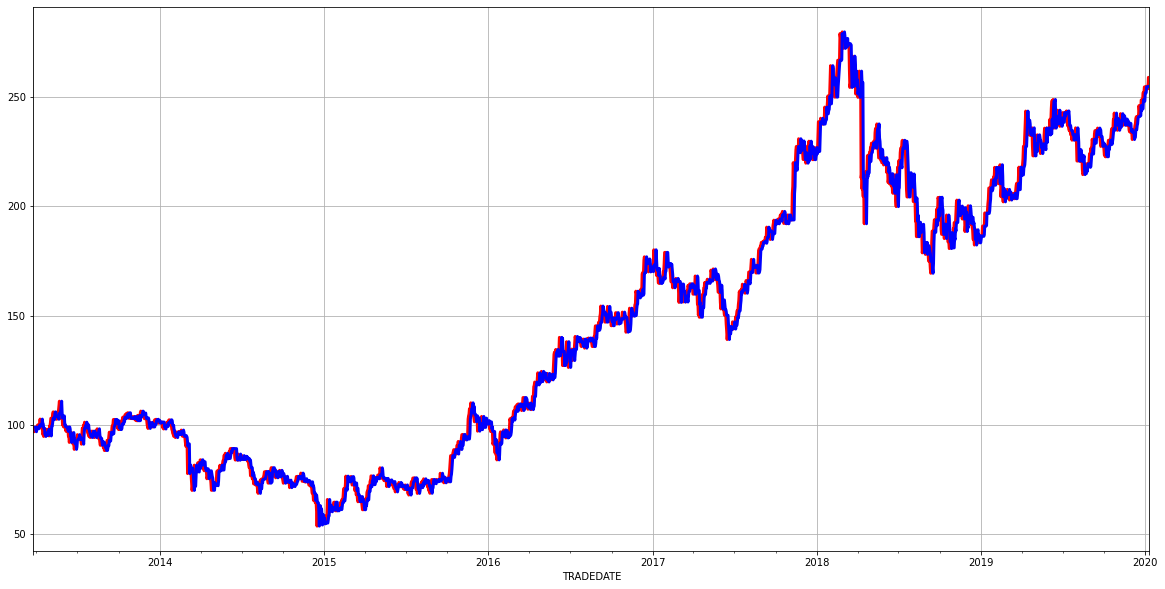

In [ ]:
ts['CLOSE'].plot(figsize=(20, 10), linewidth=3, grid=True, color='red') 
#ts['Lag_1'].plot(figsize=(20, 10), linewidth=3, grid=True, color='blue') 
#ts['Lag_3'].plot(figsize=(20, 10), linewidth=3, grid=True, color='blue') 
ts['Lag_5'].plot(figsize=(20, 10), linewidth=3, grid=True, color='blue') 

## Скользящие статистики ['mean', 'median', 'max', 'min', 'std'] с окнами 1, 3, 5 сгрупированные по дням недели

In [ ]:
for l in [1,3,5]: 
    ts['Roll_' + str(l)+'_' + 'mean'] = ts.groupby('weekday')['CLOSE'].transform(lambda x: x.rolling(window=l).mean().shift(1))
    ts['Roll_' + str(l)+'_' + 'median'] = ts.groupby('weekday')['CLOSE'].transform(lambda x: x.rolling(window=l).median().shift(1))
    ts['Roll_' + str(l)+'_' + 'max'] = ts.groupby('weekday')['CLOSE'].transform(lambda x: x.rolling(window=l).max().shift(1))
    ts['Roll_' + str(l)+'_' + 'min'] = ts.groupby('weekday')['CLOSE'].transform(lambda x: x.rolling(window=l).min().shift(1))
    ts['Roll_' + str(l)+'_' + 'std'] = ts.groupby('weekday')['CLOSE'].transform(lambda x: x.rolling(window=l).std().shift(1))


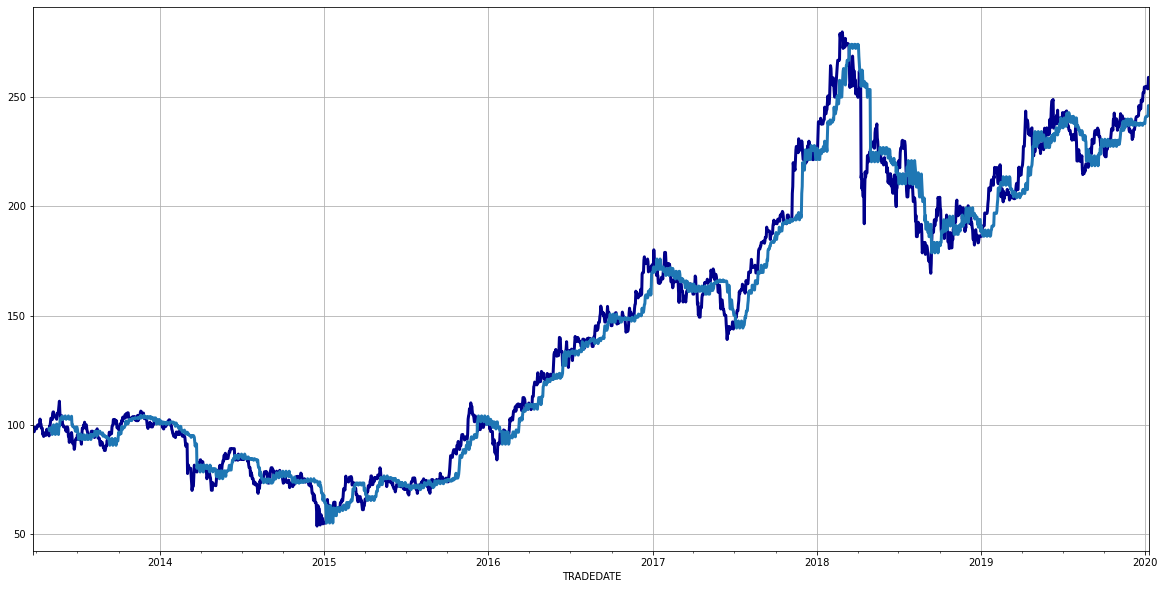

In [ ]:
ts['CLOSE'].plot(figsize=(20, 10), linewidth=3, grid=True, color='darkblue') 

ts['Roll_5_median'].plot(figsize=(20, 10), linewidth=3, grid=True) 

## Статистики ['mean', 'median', 'max', 'min', 'std'] в расширяющемся окне сгруппированные по рабочим, праздничным и предпраздничным дням

In [ ]:
for l in [1,3,5]: 
    ts['Expand_' + str(l)+'_' + 'mean'] = ts.groupby('day_type')['CLOSE'].transform(lambda x: x.expanding().mean().shift(1))
    ts['Expand_' + str(l)+'_' + 'median'] = ts.groupby('day_type')['CLOSE'].transform(lambda x: x.expanding().median().shift(1))
    ts['Expand_' + str(l)+'_' + 'max'] = ts.groupby('day_type')['CLOSE'].transform(lambda x: x.expanding().max().shift(1))
    ts['Expand_' + str(l)+'_' + 'min'] = ts.groupby('day_type')['CLOSE'].transform(lambda x: x.expanding().min().shift(1))
    ts['Expand_' + str(l)+'_' + 'std'] = ts.groupby('day_type')['CLOSE'].transform(lambda x: x.expanding().std().shift(1))


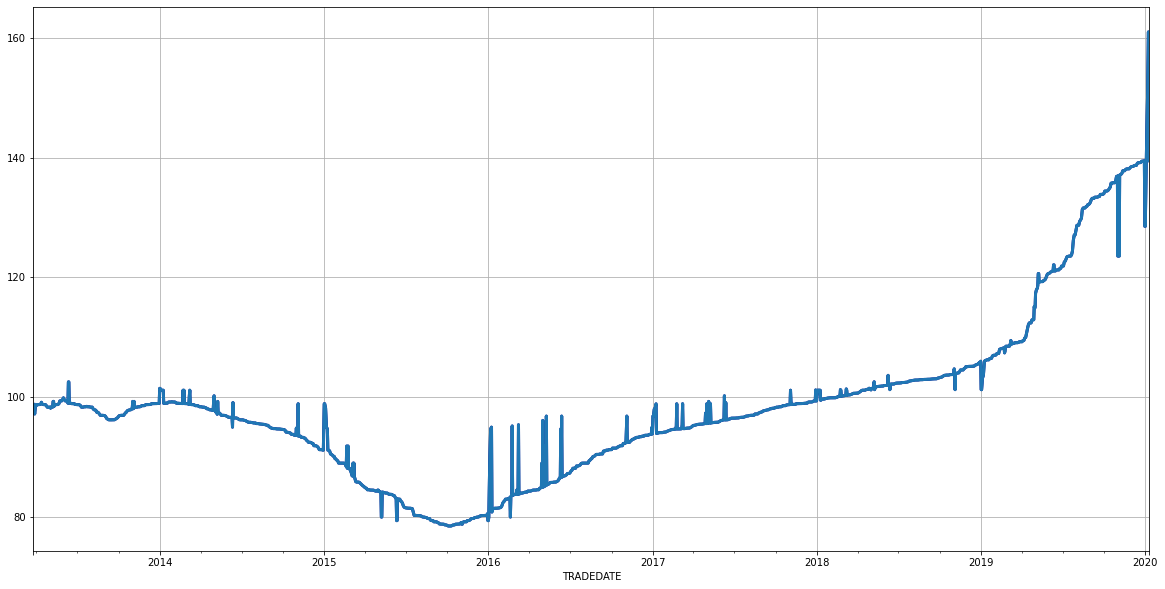

In [ ]:
ts['Expand_1_median'].plot(figsize=(20, 10), linewidth=3, grid=True, color='darkblue') 

ts['Expand_5_median'].plot(figsize=(20, 10), linewidth=3, grid=True) 